In [1]:
import sympy as sy
import numpy as np
from sympy import *

def MO(x):
    return (x[0]**2+x[1]**2+x[2]**2)**0.5

def proj(a,b):
    return sum(a*b)/np.linalg.norm(b)

知识重点
---
题目列表
---


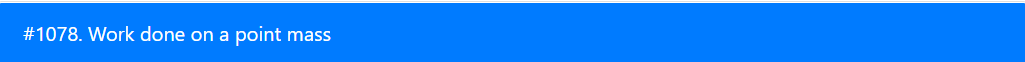

**已知坐标 $\vec r_1$，坐标 $\vec r_2$，$\vec F$ 的方向，计算$W$**  
  
**解题思路**
1. 计算 $\vec r$ 在 $\vec F$ 上的投影长度 $d$
2. $|F|\cdot d$

**题目清单**  
1. 1078
2. 137
3. 282
4. 475
5. 550
6. 490
7. 441
8. 670
9. 333
10. 424
11. 418 滚动摩擦3种情况 ⭐⭐
12. 1190 滚动 + 能量守恒 


In [2]:
m = 9
F = np.array([3, 5, 0])
t0 = 0
r0 = np.array([ 8, -5,  0])
tf = 6
rf = np.array([9, 1, 0])

r=rf-r0

proj(r,F)*np.linalg.norm(F)

33.0

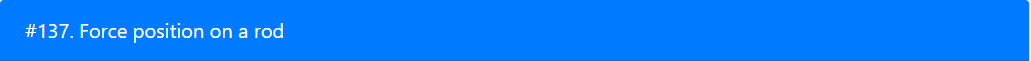

**已知外力** $\vec F_1, \vec F_2, \vec M$, **物体的质心没有角加速度，加速度，计算** $\vec F_D$   
  
**解题思路**
1. $\sum{F}=0$
2. $\sum{M}=0$

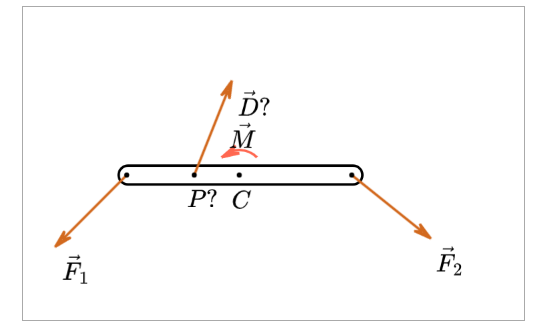

In [3]:
m = 3
l = 8
F1 = Matrix([-1,  1,  0])
F2 = Matrix([2, 4, 0])
M = Matrix([0, 0, 5])
#########################################复制部分

fx,fy,fz,p=S('fx,fy,fz,p')
Fd=Matrix([fx,fy,fz])
rd=Matrix([p,0,0])

r1=Matrix([-0.5*l,0,0])
r2=Matrix([+0.5*l,0,0])

#①合外力=0
equ1=F1+F2+Fd

#②力矩平衡
equ2=rd.cross(Fd)+r1.cross(F1)+r2.cross(F2)+M

solve([equ1,equ2],[fx,fy,fz,p])

[(-1.00000000000000, -5.00000000000000, 0.0, 3.40000000000000)]

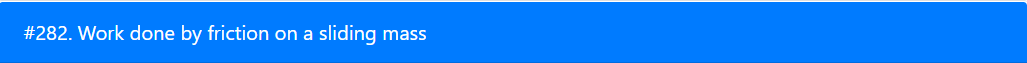

**计算摩擦力做功**

**解题思路**  
$\frac{1}{2}mv_f^2-\frac{1}{2}mv_0^2=mgh+W_f$
  
**注意：摩擦力做功是➖的,** $W_f=-127.5J$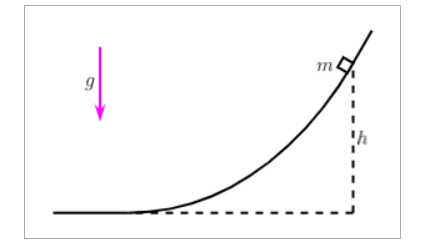

In [4]:
m=int(input('m='))
v0=int(input('v0='))
h=int(input('h='))
vf=int(input('vf='))
g=9.8


W=m*g*h-0.5*m*(vf**2-v0**2)
-W 

m=1
v0=1
h=1
vf=1


-9.8

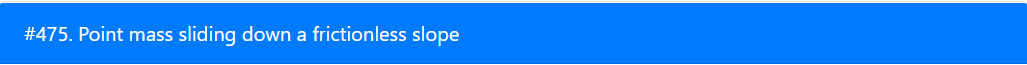

**没有摩擦力，知道$v_0,v_f,h$三个中的两个，计算另一个**  
   
$\frac{1}{2}mv_f^2-\frac{1}{2}mv_0^2=mgh$  
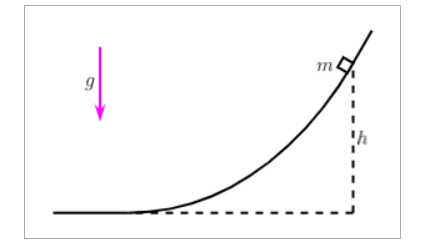  




In [5]:
m=int(input('m='))
vf=int(input('vf='))
v0=int(input('v0='))
h=int(input('h='))
g=9.8

if h==0:
    h=S('h')
if v0==0:
    v0=S('v0')
if vf==0:
    vf=S('vf')
    
equ=0.5*m*(vf**2-v0**2)-m*g*h
solve([equ],[v0,vf,h])

m=1
vf=1
v0=1
h=1


[]

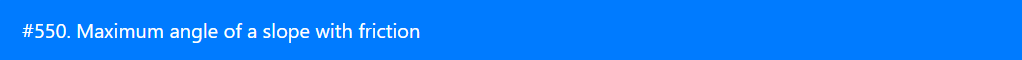

**计算不下滑的最大倾角**  
$\tan{\theta}=\mu$
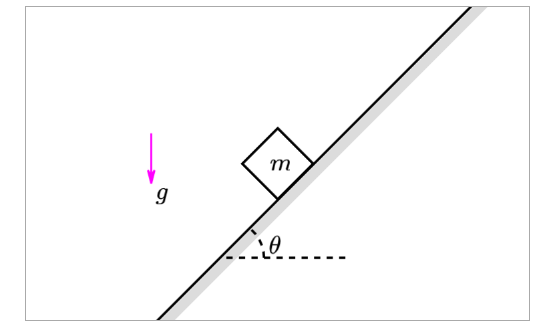

In [96]:
m = 8.000
mu = 1.125

theta=S('theta')

Fg=m*g*sin(theta)
Ff=mu*m*g*cos(theta)

float(solve([Fg-Ff],[theta])[0][0]*180/pi)

48.366460663429805

#424
---
**计算两个杆的总动能**

In [101]:
from sympy import *

m1 = 3
m2 = 8
rOP = Matrix([2, 1, 0])
rPQ = Matrix([0, 1, 0])
omega1 = Matrix([ 0,  0, -3])
omega2 = Matrix([ 0,  0, -1])
##################################复制部分
x=S('x')

r1=MO(rOP);L1=2*r1
r2=MO(rPQ);L2=2*r2
w1=MO(omega1)
w2=MO(omega2)

def MO(x):
    return (x[0]**2+x[1]**2+x[2]**2)**0.5

#①计算质心平移动能
v1=MO(omega1.cross(0.5*rOP))
KE1=0.5*m1*v1**2

vP=omega1.cross(rOP)
v2=MO(vP+omega2.cross(0.5*rPQ))
KE2=0.5*m2*v2**2

#②计算旋转动能
I1=integrate(m1/L1*x*x,[x,-r1,r1])
I2=integrate(m2/L2*x*x,[x,-r2,r2])
RE1=0.5*I1*w1**2
RE2=0.5*I2*w2**2

KE1+RE1+KE2+RE2

233.708333333333

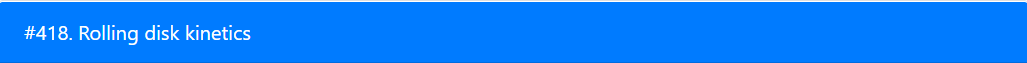

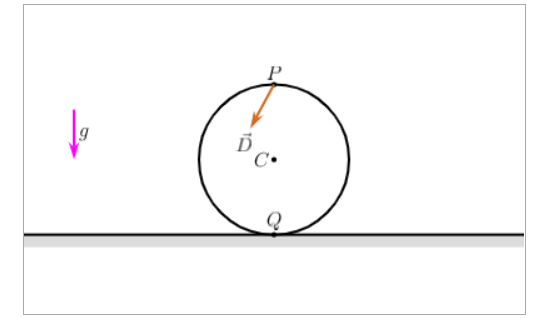

此类题目默认 $\omega=0$
---

In [4]:
m=5
r=4
g=9.8
mu=1.5
FP=Matrix([30,46,0])

I=0.5*m*r**2
rCP=  Matrix([-r,0,0])
rCQ=  Matrix([0,-r,0])
alpha=Matrix([0,0,al])
Ff=   Matrix([n*mu,0,0])
Fn=   Matrix([0,n,0])

am,ac,al,n,f=S('am,ac,al,n,f')

equFx=FP[0]+Ff[0]-m*ac
equFy=FP[1]+Fn[1]-m*g
equM=(rCP.cross(FP))[2]+(rCQ.cross(Ff))[2]-(I*alpha)[2]
equa=am-(ac+(alpha.cross(rCQ))[0])

ans=solve([equFx,equFy,equM,equa],[am,ac,al,n])
n_v=ans[n]
print('Ff=',Ff.subs(n,n_v)[0])

ans

Ff= 4.50000000000000


{am: -9.70000000000000,
 ac: 6.90000000000000,
 al: -4.15000000000000,
 n: 3.00000000000000}

In [3]:
#非滑动情况
m=5
r=4
g=9.8
mu=1.5
FP=Matrix([30,46,0])

theta=int(input('输入P点的角度='))*pi/180
am,ac,al,n,f=S('am,ac,al,n,f')

rCP=  Matrix([cos(theta)*r,sin(theta)*r,0])
rCQ=  Matrix([0,-r,0])
alpha=Matrix([0,0,al])
Ff=   Matrix([f,0,0])

am,ac,al,f=S('am,ac,al,f')
I=0.5*m*r**2

equFx=FP[0]+Ff[0]-m*ac
equM=(rCP.cross(FP))[2]+(rCQ.cross(Ff))[2]-(I*alpha)[2]
equa=am-(ac+(alpha.cross(rCQ))[0])
equ4=am-0  #这里是x方向上加速度❓❓❓❓

solve([equFx,equM,equa,equ4],[ac,am,al,f])

输入P点的角度=180


{ac: 10.1333333333333, am: 0.0, al: -2.53333333333333, f: 20.6666666666667}

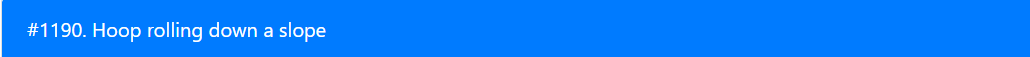

$(\frac{1}{2}mv_f^2-\frac{1}{2}mv_0^2)+(\frac{1}{2}I\omega_f^2-\frac{1}{2}I\omega_0^2)=mgH$  

**注意：这里** $H=h-r$
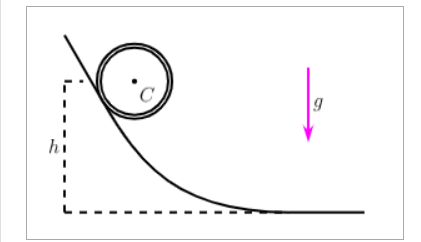

In [8]:
m=int(input('m='))
r=int(input('r='))
vf=int(input('vf='))
v0=int(input('v0='))
h=int(input('h='))
g=9.8
I=m*r**2

if h==0:
    h=S('h')
if v0==0:
    v0=S('v0')
if vf==0:
    vf=S('vf')
    
wf=vf/r
w0=v0/r
    
equ=0.5*m*(vf**2-v0**2)+0.5*I*(wf**2-w0**2)-m*g*(h-r)
solve([equ],[v0,vf,h])

m=1
r=1
vf=1
v0=1
h=1


[]